In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import glob
import os

In [7]:
df = pd.read_csv('methanogenesis.csv')

In [9]:
tit5 = pd.read_csv('../Titan PT profiles/TitanProfile_NH33WtPctZb44km.txt', delim_whitespace=True)
tit8 = pd.read_csv('../Titan PT profiles/TitanProfile_NH37WtPctZb33km.txt', delim_whitespace=True) 
tit9 = pd.read_csv('../Titan PT profiles/TitanProfile_NH37WtPctZb103km.txt', delim_whitespace=True)
# use glob to get all the csv files in the folder
path = '../Europa PT profiles/' #os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.txt"))
# Enceladus
#enc1 = pd.read_csv('../Enceladus PT profiles/EnceladusProfile_Seawater0WtPctZb5km.txt', delim_whitespace=True)
#enc2 = pd.read_csv('../Enceladus PT profiles/EnceladusProfile_Seawater0WtPctZb50km.txt', delim_whitespace=True)
#enc3 = pd.read_csv('../Enceladus PT profiles/EnceladusProfile_Seawater35WtPctZb5km.txt', delim_whitespace=True)
#enc4 = pd.read_csv('../Enceladus PT profiles/EnceladusProfile_Seawater35WtPctZb50km.txt', delim_whitespace=True)
conv = 1e-2 # from MPa to kb -- 1 megapascals = 0.01 kilobars
# Titan
tit5P, tit5T = tit5["P(MPa)"]*conv, tit5["T(K)"]
tit8P, tit8T = tit8["P(MPa)"]*conv, tit8["T(K)"]
tit9P, tit9T = tit9["P(MPa)"]*conv, tit9["T(K)"]
#enc1P, enc1T = enc1["P(MPa)"]*conv, enc1["T(K)"]
#enc2P, enc2T = enc2["P(MPa)"]*conv, enc2["T(K)"]
#enc3P, enc3T = enc3["P(MPa)"]*conv, enc3["T(K)"]
#enc4P, enc4T = enc4["P(MPa)"]*conv, enc4["T(K)"]

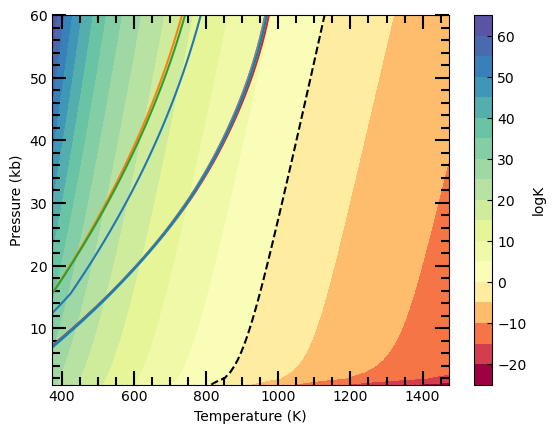

In [10]:
#fig = plt.figure(size=(10,8))
divnorm=colors.TwoSlopeNorm(vmin=np.min(df.LogK), vcenter=0., vmax=np.max(df.LogK))
cp = plt.tricontourf(df.Temperature, df.Pressure*1e-3, df.LogK, 20, cmap='Spectral', norm=divnorm)
plt.tricontour(df.Temperature, df.Pressure*1e-3, df.LogK, levels=[0.], linestyles='dashed', colors='black')

plt.autoscale(False)
# Titan geotherms
plt.plot(tit5T,tit5P,label='NH3_1')
plt.plot(tit8T,tit8P,label='NH3_4')
plt.plot(tit9T,tit9P,label='NH3_5')
# Europa geotherms
for f in csv_files:
    # read the csv file
    df = pd.read_csv(f, delim_whitespace=True)
    conv = 1e-2
    geoP, geoT = np.array(df.loc[:,["P(MPa)"]]*conv), np.array(df.loc[:,["T(K)"]])
    if np.nanmax(geoP) > 30:
        plt.plot(geoT, geoP)
'''plt.plot(enc1T,enc1P)
plt.plot(enc2T,enc2P)
plt.plot(enc3T,enc3P)
plt.plot(enc4T,enc4P)'''

plt.colorbar(cp, label='logK')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (kb)')
#plt.title('Inorganics - Alanine')
plt.tick_params(which='minor', length=6, width=1.5)
plt.tick_params(length=10, width=1.5)